# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 5 vs Chr 5p14

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [2]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_05': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-17R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_05']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-20L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-25L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-27L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-36L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-6L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-9L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\181558-10.jpg.5L.bmp',
 'D:\\Users\\Chuan\

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_05': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-17R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-1

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_05', 'chr_5_p14_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_05
   Train: 
        173550-del(5)(p14)-10L.bmp
        173550-del(5)(p14)-11L.bmp
        173550-del(5)(p14)-12L.bmp
        173550-del(5)(p14)-13L.bmp
        173550-del(5)(p14)-15L.bmp
        173550-del(5)(p14)-16L.bmp
        173550-del(5)(p14)-17R.bmp
        173550-del(5)(p14)-18L.bmp
        173550-del(5)(p14)-19L.bmp
        173550-del(5)(p14)-1_L.bmp
        173550-del(5)(p14)-21L.bmp
        173550-del(5)(p14)-22L.bmp
        173550-del(5)(p14)-23L.bmp
        173550-del(5)(p14)-24L.bmp
        173550-del(5)(p14)-26L.bmp
        173550-del(5)(p14)-28L.bmp
        173550-del(5)(p14)-29L.bmp
        173550-del(5)(p14)-2L.bmp
        173550-del(5)(p14)-30L.bmp
        173550-del(5)(p14)-31L.bmp
        173550-del(5)(p14)-32L.bmp
        173550-del(5)(p14)-33L.bmp
        173550-del(5)(p14)-34L.bmp
        173550-del(5)(p14)-35L.bmp
        173550-del(5)(p14)-5L.bmp
        173550-del(5)(p14)-7L.bmp
        173550-del(5)(p14)-8L.bmp
        181558-11.jpg.5L

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

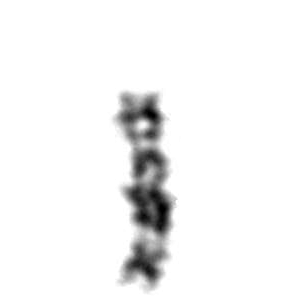

In [12]:
image['chr_05'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_05': 0, 
               'chr_5_p14_deletion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_05',
                1: 'chr_5_p14_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

237

In [25]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [26]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [29]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [30]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/150
4/4 [==============================] - 6s 851ms/step - loss: 81.3018 - accuracy: 0.4979 - val_loss: 25.1120 - val_accuracy: 0.7250
Epoch 2/150
4/4 [==============================] - 1s 150ms/step - loss: 9.4359 - accuracy: 0.4684 - val_loss: 0.8855 - val_accuracy: 0.7250
Epoch 3/150
4/4 [==============================] - 1s 133ms/step - loss: 1.3270 - accuracy: 0.5738 - val_loss: 0.5931 - val_accuracy: 0.7250
Epoch 4/150
4/4 [==============================] - 1s 135ms/step - loss: 0.7189 - accuracy: 0.4937 - val_loss: 0.9767 - val_accuracy: 0.7250
Epoch 5/150
4/4 [==============================] - 1s 140ms/step - loss: 0.8440 - accuracy: 0.6118 - val_loss: 0.7919 - val_accuracy: 0.7250
Epoch 6/150
4/4 [==============================] - 1s 132ms/step - loss: 0.7104 - accuracy: 0.7257 - val_loss: 0.5992 - val_accuracy: 0.7250
Epoch 7/150
4/4 [==============================] - 1s 128ms/step - loss: 0.5971 - accuracy: 0.7257 - val_loss: 0.6506 - val_accuracy: 0.7250
Epoch 8/150

Epoch 59/150
4/4 [==============================] - 1s 132ms/step - loss: 3.0444e-05 - accuracy: 1.0000 - val_loss: 1.8611 - val_accuracy: 0.9000
Epoch 60/150
4/4 [==============================] - 1s 134ms/step - loss: 1.6743e-05 - accuracy: 1.0000 - val_loss: 2.0592 - val_accuracy: 0.9000
Epoch 61/150
4/4 [==============================] - 1s 125ms/step - loss: 8.7389e-06 - accuracy: 1.0000 - val_loss: 2.3358 - val_accuracy: 0.9000
Epoch 62/150
4/4 [==============================] - 0s 128ms/step - loss: 4.9422e-06 - accuracy: 1.0000 - val_loss: 2.4864 - val_accuracy: 0.8750
Epoch 63/150
4/4 [==============================] - 1s 135ms/step - loss: 3.2088e-06 - accuracy: 1.0000 - val_loss: 2.5668 - val_accuracy: 0.8750
Epoch 64/150
4/4 [==============================] - 1s 130ms/step - loss: 2.3805e-06 - accuracy: 1.0000 - val_loss: 2.6233 - val_accuracy: 0.8750
Epoch 65/150
4/4 [==============================] - 1s 135ms/step - loss: 1.9233e-06 - accuracy: 1.0000 - val_loss: 2.6663 -

4/4 [==============================] - 1s 138ms/step - loss: 1.2927e-07 - accuracy: 1.0000 - val_loss: 2.9254 - val_accuracy: 0.9000
Epoch 116/150
4/4 [==============================] - 1s 131ms/step - loss: 1.2575e-07 - accuracy: 1.0000 - val_loss: 2.9286 - val_accuracy: 0.9000
Epoch 117/150
4/4 [==============================] - 1s 131ms/step - loss: 1.2424e-07 - accuracy: 1.0000 - val_loss: 2.9335 - val_accuracy: 0.9000
Epoch 118/150
4/4 [==============================] - 1s 135ms/step - loss: 1.2021e-07 - accuracy: 1.0000 - val_loss: 2.9372 - val_accuracy: 0.9000
Epoch 119/150
4/4 [==============================] - 1s 135ms/step - loss: 1.1820e-07 - accuracy: 1.0000 - val_loss: 2.9416 - val_accuracy: 0.9000
Epoch 120/150
4/4 [==============================] - 1s 136ms/step - loss: 1.1418e-07 - accuracy: 1.0000 - val_loss: 2.9455 - val_accuracy: 0.9000
Epoch 121/150
4/4 [==============================] - 1s 133ms/step - loss: 1.1166e-07 - accuracy: 1.0000 - val_loss: 2.9495 - val_ac

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19264), started 0:41:25 ago. (Use '!kill 19264' to kill it.)

## 3.8 Save the Model

In [35]:
model.save('saved_model/model_Chr_05_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_05_cnn_iteration_0\assets


## 3.9 Load the Model

In [36]:
model_reload = keras.models.load_model('saved_model/model_Chr_05_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [37]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.900


In [38]:
len(X_test)

40

In [39]:
y_predict = model_reload.predict(X_test)

In [40]:
len(y_predict)

40

In [41]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [42]:
len(y_predict_filtered)

40

In [43]:
label = ['chr_05', 'chr_5_p14_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [ ]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [ ]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [ ]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [ ]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f2)

In [ ]:
y_test

In [ ]:
y_predict

### 3.10.2. Classification Report

In [44]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.96      0.90      0.93        29
chr_5_p14_deletion       0.77      0.91      0.83        11

         micro avg       0.90      0.90      0.90        40
         macro avg       0.87      0.90      0.88        40
      weighted avg       0.91      0.90      0.90        40



### 3.10.3. Confusion Matrix

In [45]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_05,chr_5_p14_deletion
chr_05,26,3
chr_5_p14_deletion,1,10


#### Heat Map

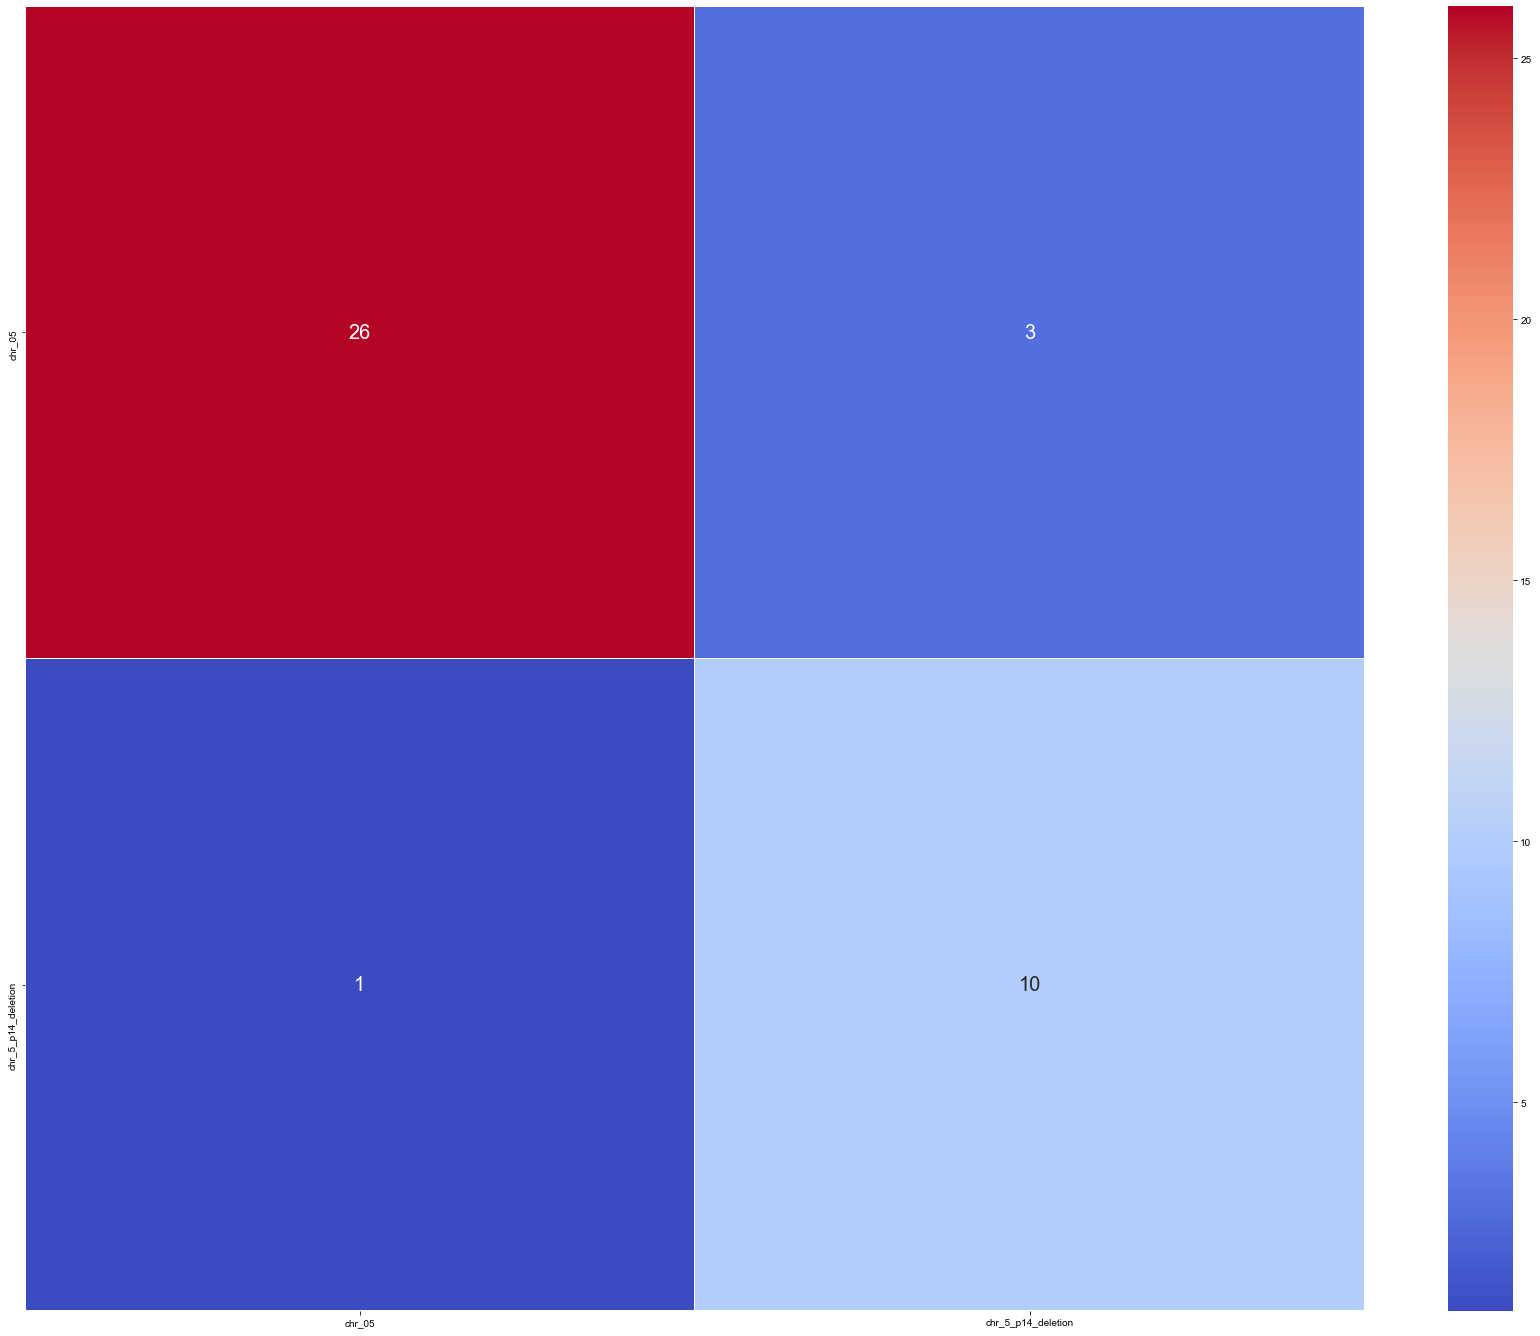

In [46]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [47]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_05_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [48]:
y_predict

array([[0.0000000e+00, 0.0000000e+00],
       [1.1788232e-22, 9.2632929e-10],
       [1.8206592e-35, 0.0000000e+00],
       [3.2738845e-09, 7.9537540e-06],
       [0.0000000e+00, 0.0000000e+00],
       [2.1844627e-08, 8.6484916e-11],
       [0.0000000e+00, 0.0000000e+00],
       [5.7138685e-09, 1.4401018e-11],
       [6.8354393e-06, 1.8251075e-07],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2604675e-24],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [5.1607659e-33, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.9145839e-33, 0.0000000e+00],
       [1.5490918e-28, 2.8076315e-37],
       [0.0000000e+00, 0.

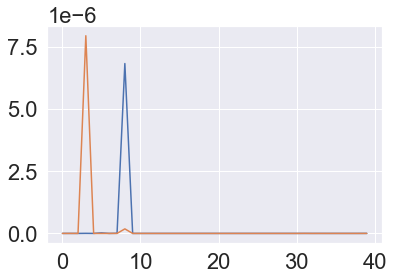

In [49]:
plt.plot(y_predict)

In [50]:
y_predict_1D = y_predict[:,0]

In [51]:
y_predict_1D_processed = 1- y_predict_1D

In [52]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [53]:
auc_rf

0.5172413793103448

In [54]:
x = y = np.arange(0,1.1,0.1)

In [55]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

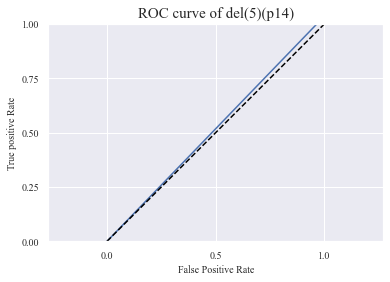

In [56]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of del(5)(p14)', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [57]:
auc_value = auc(fpr, tpr)

In [58]:
print('AUC is ', auc_value)

AUC is  0.5172413793103448


# Results

In [59]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.900


In [60]:
print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.96      0.90      0.93        29
chr_5_p14_deletion       0.77      0.91      0.83        11

         micro avg       0.90      0.90      0.90        40
         macro avg       0.87      0.90      0.88        40
      weighted avg       0.91      0.90      0.90        40



In [61]:
type(performanceReport)

str

In [62]:
confusion

,chr_05,chr_5_p14_deletion
chr_05,26,3
chr_5_p14_deletion,1,10


In [63]:
print('AUC is ', auc_value)

AUC is  0.5172413793103448


## Export to a text file

In [64]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()